# 4.9 Part 2 Visualisations

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Reletive path
path = '../'

# Loading dataframe ords_prods_cust_merge.pkl
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_merge.pkl'))

## Orders by day of week bars

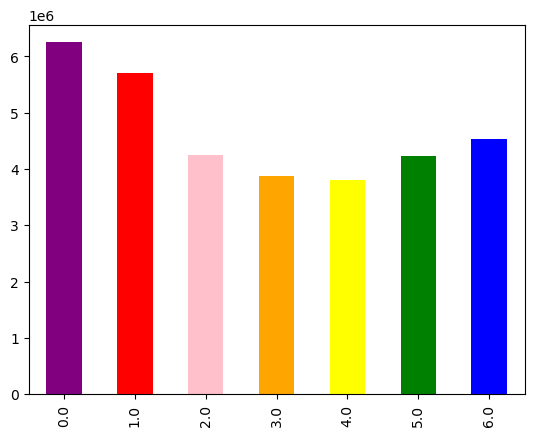

In [3]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [4]:
# Saving chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## Prices hitogram

<AxesSubplot:ylabel='Frequency'>

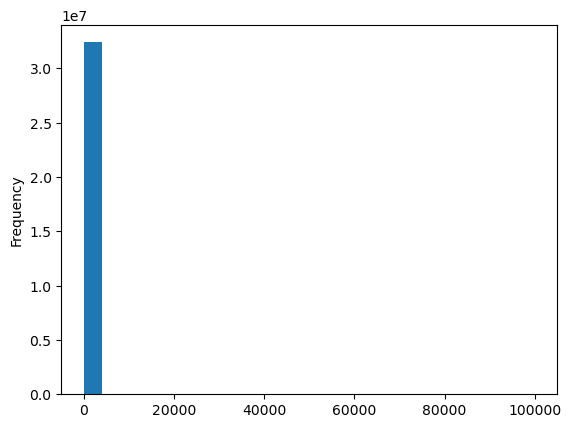

In [5]:
ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

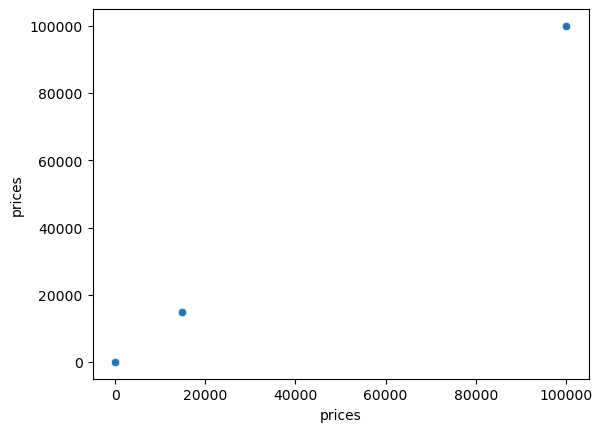

In [6]:
# Making scutterplot for a price check
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [7]:
# Looking for outliers
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,median_prior_orders,order_frequency_flag,gender,state,age,date_joined,number_dependants,family_status,income,_merge
7877,24261.0,1435153.0,1519,prior,26.0,2.0,11.0,6.0,21553.0,15.0,...,6.0,Frequent customer,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
7878,24267.0,1066435.0,1519,prior,32.0,3.0,10.0,5.0,21553.0,28.0,...,6.0,Frequent customer,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
15268,39073.0,1697208.0,2409,prior,33.0,1.0,19.0,5.0,21553.0,1.0,...,5.0,Frequent customer,Female,Hawaii,55,11/11/2018,2,married,230074,both
20424,57126.0,965345.0,3531,prior,27.0,2.0,19.0,8.0,33664.0,2.0,...,8.0,Frequent customer,Female,Hawaii,80,10/6/2019,2,married,233776,both
20663,61481.0,2943740.0,3793,prior,1.0,2.0,9.0,NaN,21553.0,3.0,...,14.0,Regular customer,Male,Louisiana,59,8/23/2019,3,married,182933,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32614510,3411856.0,3172853.0,205650,prior,18.0,1.0,9.0,7.0,21553.0,17.0,...,6.0,Frequent customer,Male,Kentucky,62,10/2/2017,0,divorced/widowed,302526,both
32622824,3414691.0,2504315.0,205818,prior,3.0,5.0,15.0,3.0,21553.0,13.0,...,12.0,Regular customer,Male,Maryland,60,7/12/2019,1,married,172539,both
32622825,3414693.0,1108388.0,205818,prior,5.0,4.0,5.0,1.0,21553.0,5.0,...,12.0,Regular customer,Male,Maryland,60,7/12/2019,1,married,172539,both
32634672,3418470.0,1916142.0,206049,prior,1.0,2.0,17.0,NaN,21553.0,2.0,...,7.0,Frequent customer,Female,District of Columbia,23,4/26/2019,1,married,169022,both


In [8]:
# Removing outliers
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [9]:
# Max price check
ords_prods_merge['prices'].max()

25.0

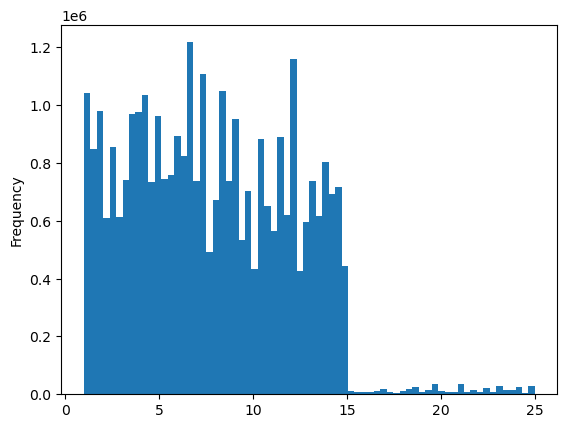

In [10]:
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [11]:
# Saving histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [12]:
ords_prods_merge.shape

(32641268, 33)

### Line chart (Sampling)

In [13]:
# Assining random value
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [14]:
# Spliting dataframe
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [15]:
# Checking leangth
print( 'ords_prods_merge leangth: ', len(ords_prods_merge), '\n', 'big + small leangth: ', len(big)+len(small) )

ords_prods_merge leangth:  32641268 
 big + small leangth:  32641268


In [16]:
# Reducing your samples to 'orders_day_of_week','prices'
df_2 = small[['orders_day_of_week','prices']]

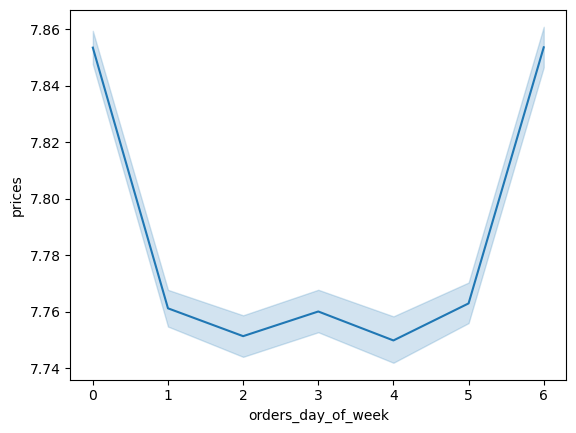

In [17]:
# Plotting line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [18]:
# Saving linechart 
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Line_prices.png'))

## A histogram of the “order_hour_of_day” column (Q3)

In [20]:
# Cheching how meny beens will be needed.
ords_prods_merge['order_hour_of_day'].value_counts()

10.0    2781009
11.0    2755369
14.0    2709084
15.0    2682090
13.0    2680171
12.0    2637533
16.0    2554110
9.0     2471067
17.0    2104225
8.0     1729871
18.0    1649870
19.0    1268365
20.0     983232
7.0      897163
21.0     801052
22.0     638671
23.0     405051
6.0      292533
0.0      220337
1.0      116589
5.0       88661
2.0       69904
4.0       53636
3.0       51675
Name: order_hour_of_day, dtype: int64

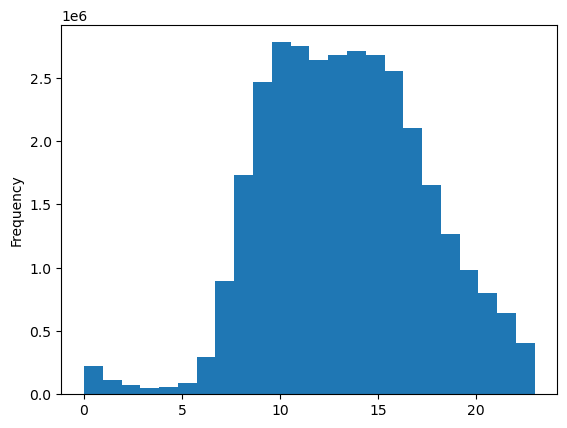

In [21]:
# Plotting hist of order_hour_of_day column
hist_order_hour_of_day = ords_prods_merge['order_hour_of_day'].plot.hist(bins = 24)

Observation: Most of orders made between 8 and 19 o'clock.

In [25]:
# Saving histogram
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour_of_day.png'))

## A bar chart from the “loyalty_flag” column (Q4)

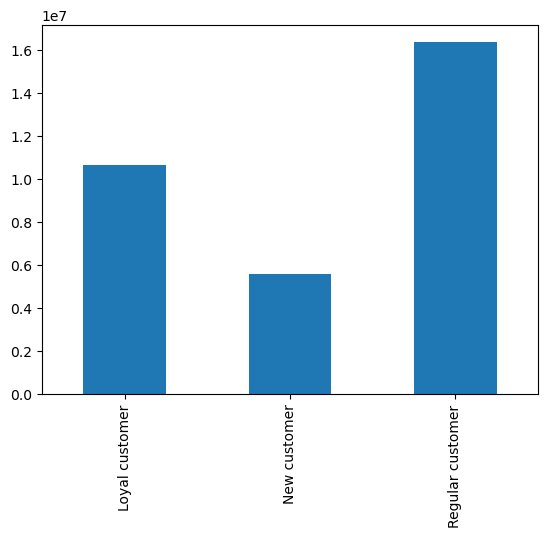

In [26]:
bar_loyalty_flag = ords_prods_merge['loyalty_flag'].value_counts().sort_index().plot.bar()

In [24]:
ords_prods_merge['loyalty_flag'].value_counts()

Regular customer    16381472
Loyal customer      10679578
New customer         5580218
Name: loyalty_flag, dtype: int64

In [27]:
# Saving histogram
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

## Difference in expenditure (the “prices” column) depending on the hour of the day. (Q5)

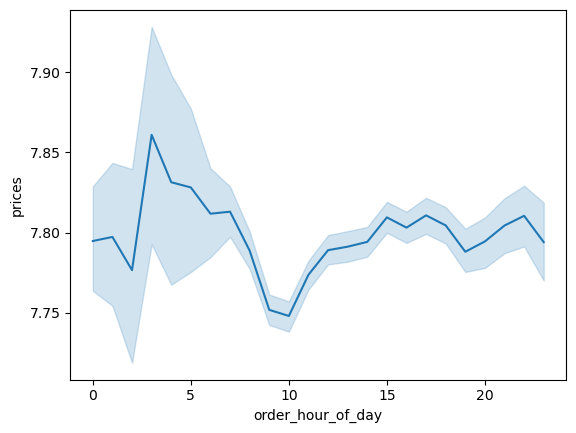

In [28]:
# Reducing your samples to 'orders_day_of_week','prices'
df_3 = small[['order_hour_of_day','prices']]
line_hour_prices = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [31]:
# Saving linechart 
line_hour_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Line_hour_prices.png'))

## A line chart exploring the connections between age and number of dependents (Q6)

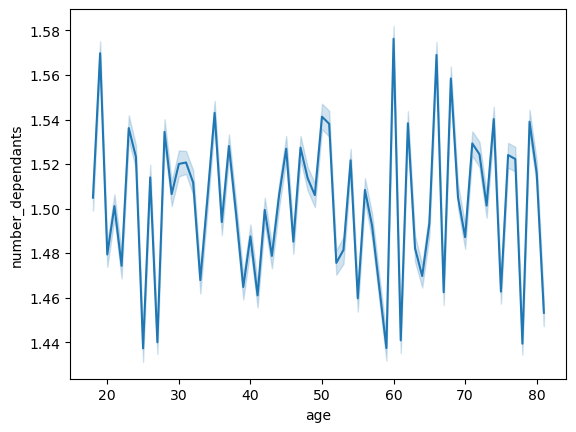

In [34]:
# Reducing your samples to 'number_dependants','age'
df_4 = small[['number_dependants', 'age']]
line_number_of_dependants_to_age = sns.lineplot(data = df_4, x = 'age', y = 'number_dependants')

In [35]:
# Saving linechart 
line_number_of_dependants_to_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Line_number_of_dependants_to_age.png'))

## A connection between age and spending power (income)

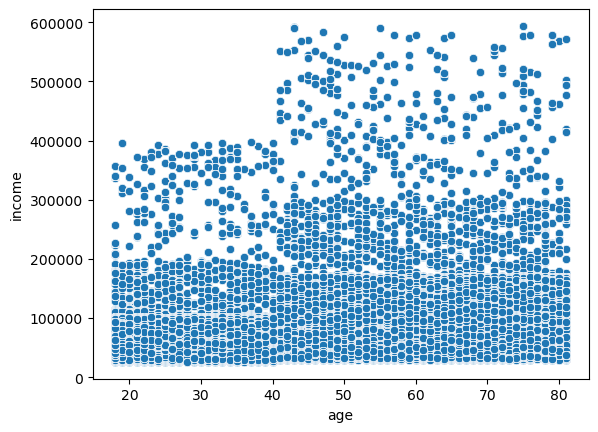

In [37]:
df_income_age = small [['income', 'age']]
# Making scutterplot for a relation between age and income
scatterplot_income_age = sns.scatterplot(x = 'age', y = 'income',data = df_income_age)

Observations. 
There is 4 main clusters of instacart customers:

1) Main mass of people with income of from 0 to 200K

2) People of age over 40 with income from 200K to 300K

3) People of age from 20 to 40 with income from 200k to 400k

4) People over 40 with income over 300K


In [38]:
# Saving income to age scatterplot 
scatterplot_income_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_income_age.png'))